In [7]:
import pandas as pd

df = pd.read_csv("lastMileDeliveryTimesWithCats.csv")
df.head()

,DeliveryTime,NumberPackagesDelivered,Temperature,DistanceToCityCenterFromDC,DriverExperience,DriverSafetyIncidents,VehicleType,FulfillmentChannel
0,6.7,110,61.9,32.0,13.2,3,Gas,SFS
1,6.1,96,42.3,30.7,12.7,2,Gas,SFS
2,2.6,94,40.6,30.3,13.7,4,Gas,SFDC
3,7.5,98,57.2,33.7,8.3,4,Electric,SFS
4,3.4,99,61.4,28.3,13.7,4,Gas,SFS


In [8]:
df['is_late'] = (df['DeliveryTime'] > 10).astype(int)
print(df['is_late'].value_counts())

is_late
0    984
1     16
Name: count, dtype: int64


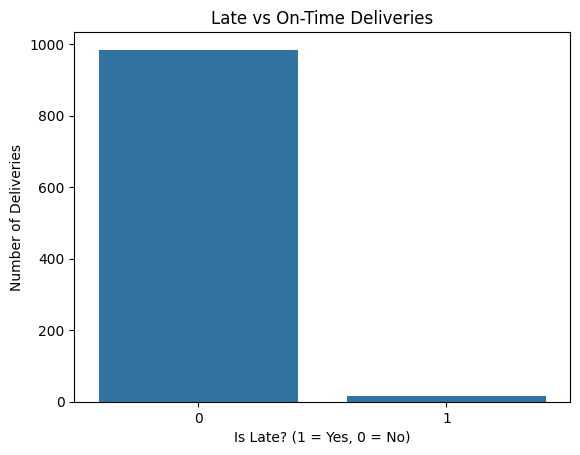

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='is_late', data=df)
plt.title("Late vs On-Time Deliveries")
plt.xlabel("Is Late? (1 = Yes, 0 = No)")
plt.ylabel("Number of Deliveries")
plt.show()


In [10]:
print(df['VehicleType'].unique())  
print(df['FulfillmentChannel'].unique())   

['Gas' 'Electric']
['SFS' 'SFDC']


In [11]:
df_encoded= pd.get_dummies(df, columns=['VehicleType', 'FulfillmentChannel'], drop_first=True)
print(df_encoded.head(10))

   DeliveryTime  NumberPackagesDelivered  Temperature  \
0           6.7                      110         61.9   
1           6.1                       96         42.3   
2           2.6                       94         40.6   
3           7.5                       98         57.2   
4           3.4                       99         61.4   
5           7.1                      100         75.6   
6           3.4                       97         48.7   
7           4.7                      111         51.1   
8           7.2                      101         62.1   
9           3.5                       96         49.4   

   DistanceToCityCenterFromDC  DriverExperience  DriverSafetyIncidents  \
0                        32.0              13.2                      3   
1                        30.7              12.7                      2   
2                        30.3              13.7                      4   
3                        33.7               8.3                      4   
4 

In [12]:
!pip install scikit-learn


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [14]:
x= df_encoded.drop('is_late', axis=1)
y=df_encoded['is_late']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 8)
X_test shape: (200, 8)
y_train shape: (800,)
y_test shape: (200,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00         2

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[198   0]
 [  0   2]]


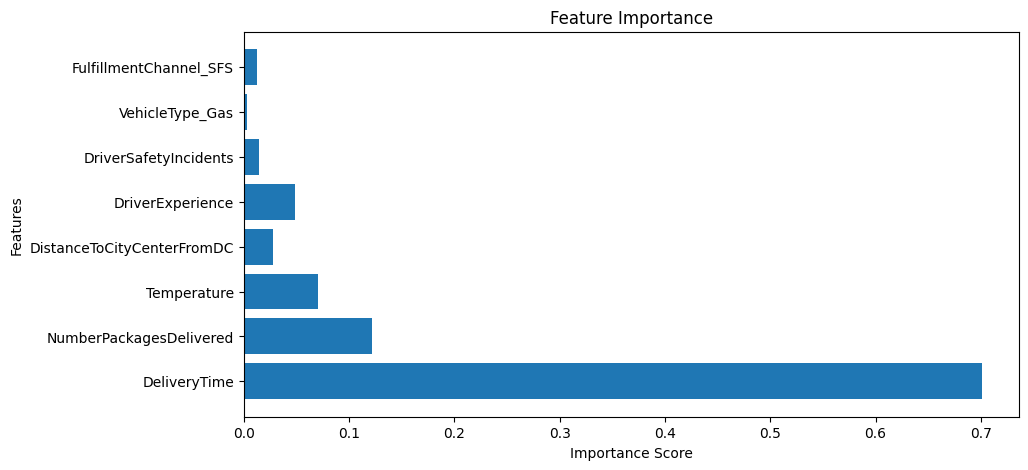

In [21]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = x_train.columns
plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

